

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>


# Project Description


Você decidiu abrir uma pequena cafeteria com garçons robôs em Los Angeles. É um
projeto bem promissor, mas caro, então você e seus parceiros decidem tentar atrair
investidores. Eles estão interessados nas condições atuais do mercado e querem saber
se você conseguirá manter seu sucesso quando a novidade de garçons robôs
esmorecer.
Você é um guru de análise, então seus parceiros te pediram para preparar uma
pesquisa do mercado. Você tem dados de código aberto sobre restaurantes em LA.


## initializing 

In [246]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from numpy import linspace


## reading files

In [248]:
# reading files

try:
    rest = pd.read_csv("/datasets/rest_data_us.csv")

except FileNotFoundError:
    rest = pd.read_csv("rest_data_us.csv")

In [249]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [250]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [251]:
# checking for duplicated values

rest.duplicated().value_counts()

False    9651
dtype: int64

* 3 missing values were found in 'chain' column
* no duplicated values found
* data needs no type modification

## cleaning data

In [254]:
# calculating percentage of missing values

(rest['chain'].isna().value_counts() / len(rest)) * 100

False    99.968915
True      0.031085
Name: chain, dtype: float64

In [255]:
# dropping missing values data

rest = rest.dropna(subset=['chain'])

In [256]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


    Missing values are 0.03% of total data, I decided to drop the rows with missing values

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


# Analyzing data

### Investigue as proporções de vários tipos de estabelecimentos. Construa um gráfico.

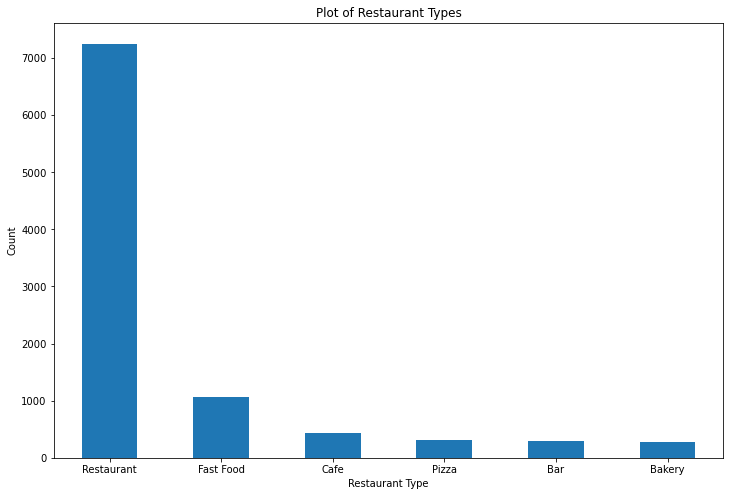

In [261]:
# ploting with matplotlib

plt.figure(figsize=(12,8))
rest['object_type'].value_counts().plot(kind='bar')
plt.title('Plot of Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [262]:
# saving restaurant types counts in rest_type variable

rest_type = rest['object_type'].value_counts().reset_index(name='count')


In [263]:
rest_type

,index,count
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


In [264]:
# calculating ratio

rest_type['ratio'] = (rest_type['count'] / rest_type['count'].sum())*100
rest_type

,index,count,ratio
0,Restaurant,7253,75.176202
1,Fast Food,1066,11.048922
2,Cafe,435,4.508706
3,Pizza,319,3.306385
4,Bar,292,3.026534
5,Bakery,283,2.933250


In [265]:
rest_type = rest_type.rename(columns={'index':'object_type'})

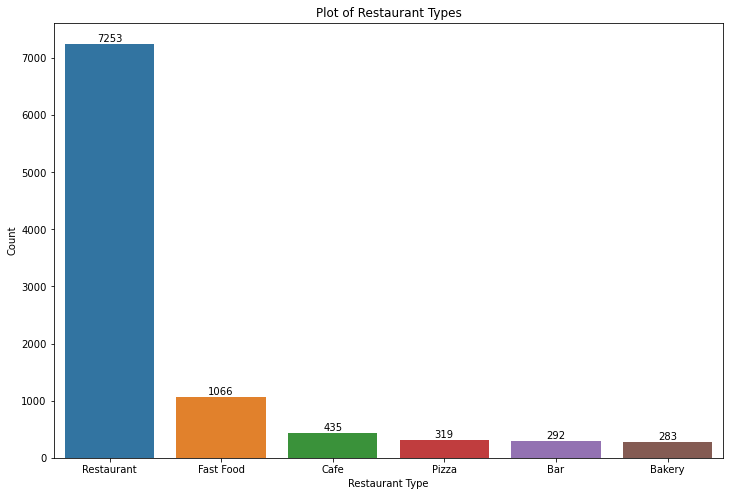

In [266]:
# ploting with seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='object_type', y='count', data=rest_type) 
for index, value in enumerate(rest_type['count']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Plot of Restaurant Types')
plt.show()

    we can see restaurant make 75% of all types, fast food come as second with only 11%

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito, boa escoha de visualização!
</div>


### Investigue as proporções de estabelecimentos de rede e não. Construa um gráfico.

In [270]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


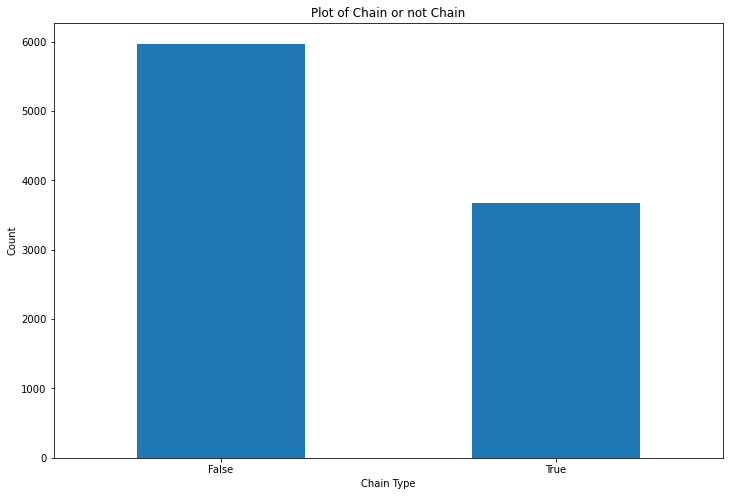

In [271]:
# ploting with matplotlib

plt.figure(figsize=(12,8))
rest['chain'].value_counts().plot(kind='bar')
plt.title('Plot of Chain or not Chain')
plt.xlabel('Chain Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [272]:
# counting how many restaurants are and are not chains

rest_chain = rest['chain'].value_counts().reset_index(name='count')

In [273]:
rest_chain

,index,count
0,False,5972
1,True,3676


In [274]:
# calculating ratio

rest_chain['ratio'] = (rest_chain['count'] / rest_chain['count'].sum())*100
rest_chain

,index,count,ratio
0,False,5972,61.898839
1,True,3676,38.101161


<div class="alert alert-block alert-warning">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

É importante executar o código. Tive de retificar o código.
</div>

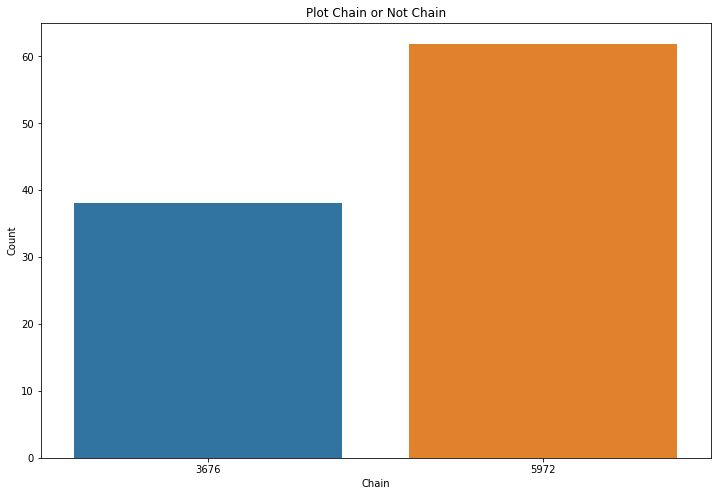

In [276]:
# ploting with seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='ratio', data=rest_chain)  
plt.xlabel('Chain')
plt.ylabel('Count')
plt.title('Plot Chain or Not Chain')
plt.show()

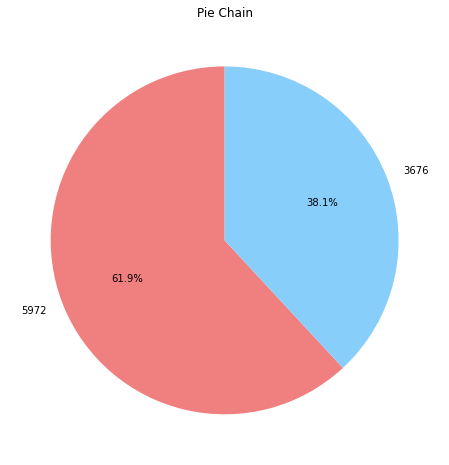

In [277]:
# plotting pie chart

plt.figure(figsize=(12, 8))
plt.pie(rest_chain['ratio'], labels=rest_chain['count'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Pie Chain')
plt.show()

    61.9% of the restaurants are not food chain and 38.1% are chains


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Dados e plot corretos e com a devida interpretação!
</div>


### Qual tipo de estabelecimento é típico para redes?

In [281]:
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [282]:
rest['chain'].unique()

array([False, True], dtype=object)

In [283]:
# filtering by restaurants that are chains

rest_chain_true = rest.query('chain == True')
rest_chain_true

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


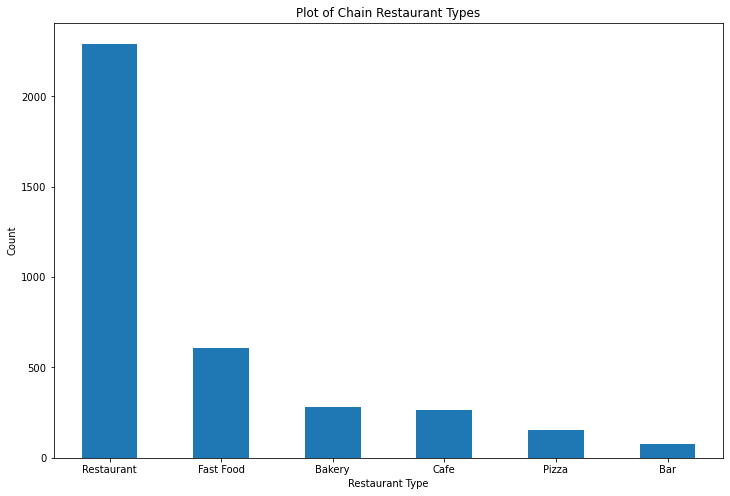

In [284]:
# ploting with matplotlib

plt.figure(figsize=(12,8))
rest_chain_true['object_type'].value_counts().plot(kind='bar')
plt.title('Plot of Chain Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [285]:
# saving restaurant types that are in chains

rest_chain_true_counts = rest_chain_true['object_type'].value_counts().reset_index()


In [286]:
# calculating ratio

rest_chain_true_counts.rename(columns={'object_type' : 'count'}, inplace=True)
rest_chain_true_counts['ratio'] = (rest_chain_true_counts['count'] / rest_chain_true_counts['count'].sum())*100
rest_chain_true_counts

,index,count,ratio
0,Restaurant,2292,62.350381
1,Fast Food,605,16.458107
2,Bakery,283,7.698585
3,Cafe,266,7.236126
4,Pizza,153,4.162133
5,Bar,77,2.094668


<div class="alert alert-block alert-warning">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

É importante executar o código. Tive de retificar o código.
</div>

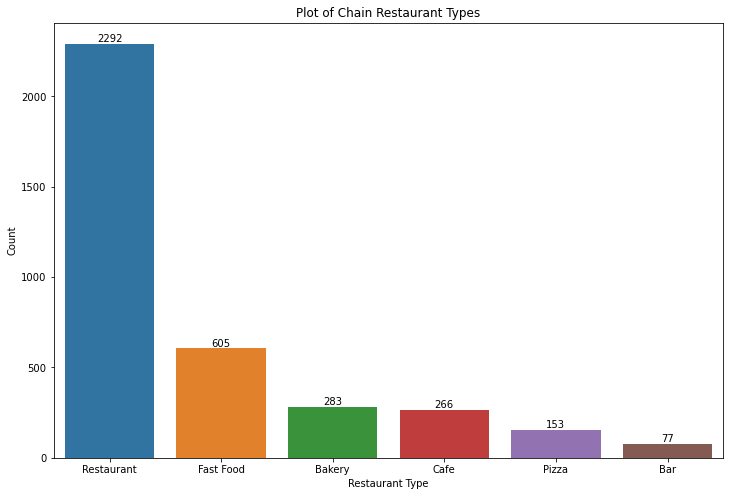

In [288]:
# ploting with seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='count', data=rest_chain_true_counts)
for index, value in enumerate(rest_chain_true_counts['count']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.title('Plot of Chain Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()

    62% are type restaurants that are chains and 16% are fast food chains

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Acho que podemos melhorar nesse item.
    
Para sabermos o estabelecimento típico para redes, além da análise (correta) feita acima, vale ponderar para cada tipo de estabelecimento o % que se trata de rede / não rede.
    
Dessa forma saberemos se há mais redes de restaurante por ser realmente típico ou se isso ocorre por termos mais estabelecimentos de forma geral.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Tentei de varias formas aqui conseguir plotar um grafico, mas pq as colunas estao booleanas nao indetifica como uma coluna, preciso de ajuda aqui
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Você chegou muito perto da solução. Parabéns. Veja este código abaixo usando o Seaborn. Eu particularmente prefiro plotar gráficos usando Seaborn. O que você acha do código?
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>
bem mais simples!! passei um tempo pra fazer o q vc fez com uma linha de codigo! 
</div>

In [294]:
# rest chain type pivot table

rest_type_chain = pd.pivot_table(rest, index='object_type', columns='chain', aggfunc=('size'), fill_value=0).reset_index()
rest_type_chain

chain,object_type,False,True
0,Bakery,0,283
1,Bar,215,77
2,Cafe,169,266
3,Fast Food,461,605
4,Pizza,166,153
5,Restaurant,4961,2292


In [295]:
# false ratio column

rest_type_chain['false_ratio'] = (rest_type_chain[False] / (rest_type_chain[False] + rest_type_chain[True])) * 100

In [296]:
# true ratio column

rest_type_chain['true_ratio'] = (rest_type_chain[True] / (rest_type_chain[False] + rest_type_chain[True])) * 100

In [297]:
rest_type_chain

chain,object_type,False,True,false_ratio,true_ratio
0,Bakery,0,283,0.000000,100.000000
1,Bar,215,77,73.630137,26.369863
2,Cafe,169,266,38.850575,61.149425
3,Fast Food,461,605,43.245779,56.754221
4,Pizza,166,153,52.037618,47.962382
5,Restaurant,4961,2292,68.399283,31.600717


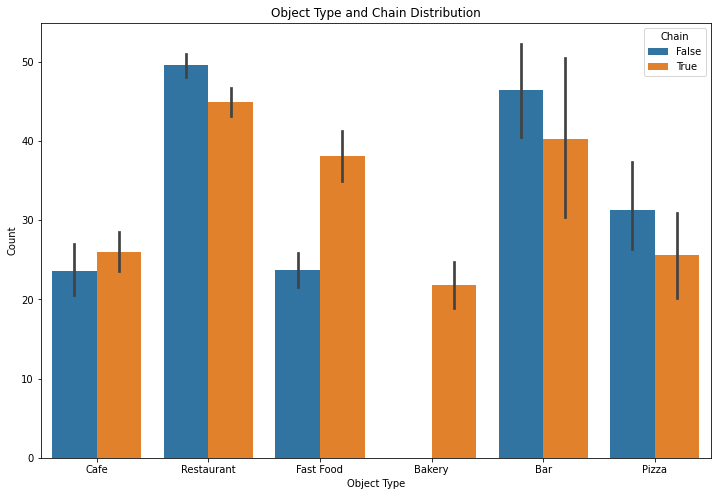

In [298]:
plt.figure(figsize=(12,8))
sns.barplot(data=rest, x="object_type", y="number", hue="chain")
plt.title('Object Type and Chain Distribution')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.legend(title='Chain')
plt.show()

 * There are no bakeries that are chain
 * 73% of the bars are not in chains
 * 61% of the cafe's are in chain
 * 56% of the fast food restaurants are chain
 * 52% of the pizza restaurants are not chain
 * 68% of the ordinary restaurants are not chain

### O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?

In [301]:
rest_chain

,index,count,ratio
0,False,5972,61.898839
1,True,3676,38.101161


In [302]:
rest_chain.rename(columns={'index':'chain'}, inplace=True)

In [303]:
# grouping by chain true or not and average number of seats

avg_seat_chain = rest.groupby('chain')['number'].mean().round(2).reset_index()
avg_seat_chain

,chain,number
0,False,46.17
1,True,39.69


In [304]:
# merging avg number fo seat to rest_chain

avg_seat_rest_chain = rest_chain.merge(avg_seat_chain, on='chain')
avg_seat_rest_chain

,chain,count,ratio,number
0,False,5972,61.898839,46.17
1,True,3676,38.101161,39.69


In [305]:
rest_chain

,chain,count,ratio
0,False,5972,61.898839
1,True,3676,38.101161


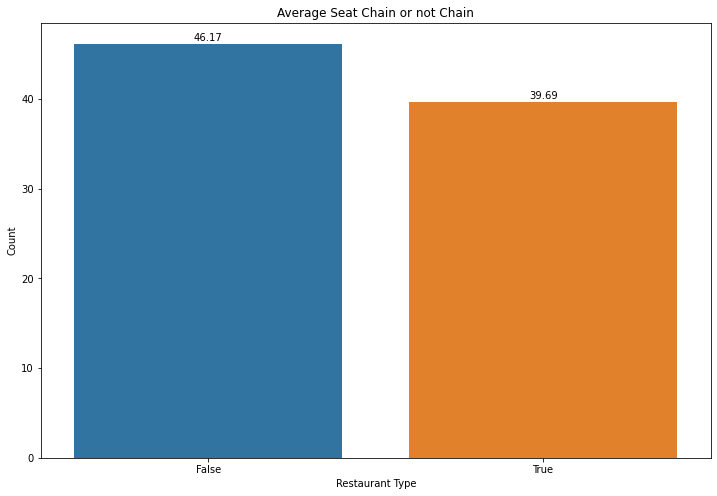

In [306]:
# plotting with seaborn

plt.figure(figsize=(12, 8))
sns.barplot(x='chain', y='number', data=avg_seat_rest_chain)
for index, value in enumerate(avg_seat_rest_chain['number']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.title('Average Seat Chain or not Chain')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Este código está com erro. O que você pretende plotar no eixo x e y? Veja o código que deixei usando como seaborn. Não vou dar a resposta pois você é capaz de ver o código e replicar. Qualquer dúvida, me fale que te dou dicas.
</div>

    Restaurants that are not chains have an average of 6.48 more seats than restaurants that are chains

<s><div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Gostei da forma que conduziu a análise! Faz bastante sentido!
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Preciso me atentar a mudancas feitas no codigo la no comeco e nao me certificando que as mudancas sao feitas na sequencia. 

Reparei q dependendo da versao, py39 ou py310, quando uso o reset_index() a coluna ficou com nome de index nao de count
</div>

### Determine o número médio de assentos para cada tipo de restaurante. Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.

In [312]:
# grouping by restaurant type and average number of seats

rest_avg_seat = rest.groupby('object_type')['number'].mean().round(2).reset_index()

In [313]:
# sorting values

rest_avg_seat.sort_values(by='number', ascending=False, inplace=True)
rest_avg_seat

,object_type,number
5,Restaurant,48.05
1,Bar,44.77
3,Fast Food,31.84
4,Pizza,28.55
2,Cafe,25.00
0,Bakery,21.77


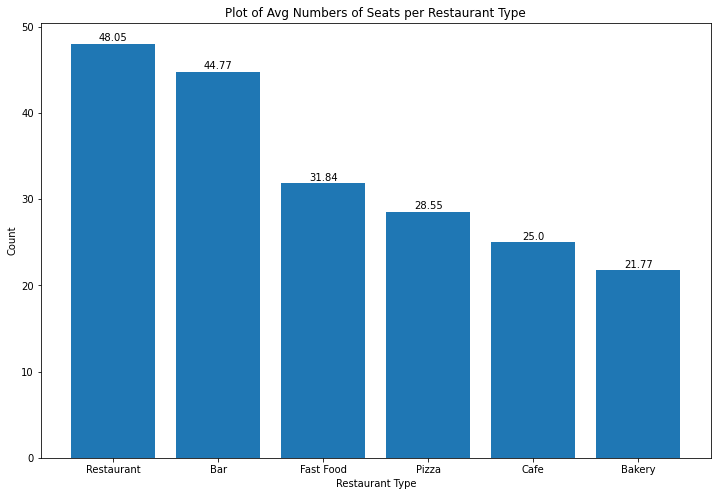

In [314]:
# ploting with matplotlib

plt.figure(figsize=(12,8))
plt.bar(rest_avg_seat['object_type'], rest_avg_seat['number'])
for index, value in enumerate(rest_avg_seat['number']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.title('Plot of Avg Numbers of Seats per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

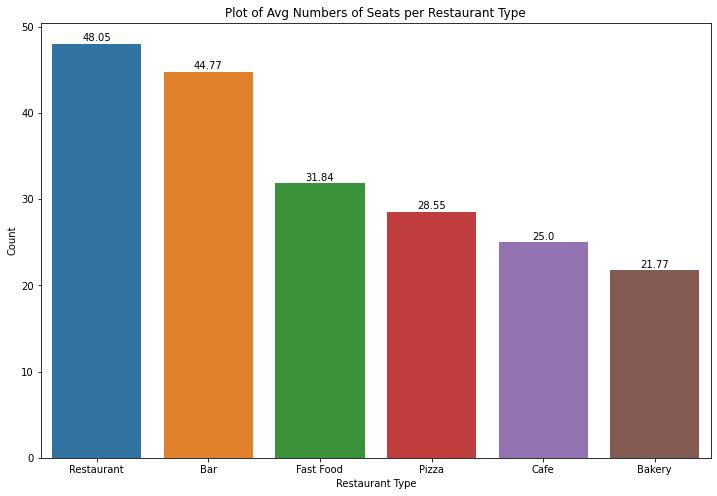

In [315]:
# ploting with seaborn

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='object_type', y='number', data=rest_avg_seat)
for index, value in enumerate(rest_avg_seat['number']):
    ax.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.title('Plot of Avg Numbers of Seats per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

    We see above restaurants have average of 48 seats, followed by bars with average of 44 seats, bakeries have the small average at 21 seats.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito o trabalho por aqui!
</div>


### Coloque os dados dos nomes das ruas da coluna address em uma coluna separada.

In [319]:
# extracting only strings from address and saving in a new column

rest['address_name'] = rest['address'].str.extract('([a-zA-Z\s]+)')

In [320]:
rest.head()

,id,object_name,address,chain,object_type,number,address_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


### Construa um gráfico de dez ruas com o maior número de restaurantes.

In [322]:
# saving restaurants by address

rest_by_address = rest['address_name'].value_counts().reset_index().sort_values(by='address_name',ascending=False)
rest_by_address.rename(columns={'address_name' : 'count'}, inplace=True)

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Código com erro. Veja que o nome da coluna é address_name em vez de count
</div>

In [324]:
rest_by_address.head(10)

,index,count
0,W,756
1,E,319
2,W SUNSET BLVD,296
3,W PICO BLVD,288
4,HOLLYWOOD BLVD,167
5,,162
6,WILSHIRE BLVD,161
7,S VERMONT AVE,148
8,SANTA MONICA BLVD,146
9,BEVERLY BLVD,135


In [325]:
# selecting indexes that have no address information and W and E that represent an area not a street

index_to_drop = [0, 1, 5]


In [326]:
# dropping indexes above

rest_by_address.drop(index_to_drop, inplace=True)

In [327]:
rest_by_address.head()

,index,count
2,W SUNSET BLVD,296
3,W PICO BLVD,288
4,HOLLYWOOD BLVD,167
6,WILSHIRE BLVD,161
7,S VERMONT AVE,148


In [328]:
# saving top 10 of restaurants count by street

top10_streets_rest = rest_by_address.head(10)

In [329]:
top10_streets_rest = top10_streets_rest.copy()

In [330]:
top10_streets_rest

,index,count
2,W SUNSET BLVD,296
3,W PICO BLVD,288
4,HOLLYWOOD BLVD,167
6,WILSHIRE BLVD,161
7,S VERMONT AVE,148
8,SANTA MONICA BLVD,146
9,BEVERLY BLVD,135
10,S FIGUEROA ST,134
11,MELROSE AVE,128
12,S WESTERN AVE,128


In [331]:
# calculationg ratio

top10_streets_rest['ratio'] = (top10_streets_rest['count'] / top10_streets_rest['count'].sum())*100

In [332]:
top10_streets_rest.head(10)

,index,count,ratio
2,W SUNSET BLVD,296,17.099942
3,W PICO BLVD,288,16.637782
4,HOLLYWOOD BLVD,167,9.647603
6,WILSHIRE BLVD,161,9.300982
7,S VERMONT AVE,148,8.549971
8,SANTA MONICA BLVD,146,8.434431
9,BEVERLY BLVD,135,7.798960
10,S FIGUEROA ST,134,7.741190
11,MELROSE AVE,128,7.394570
12,S WESTERN AVE,128,7.394570


In [333]:
top10_streets_rest['count'].sum()

1731

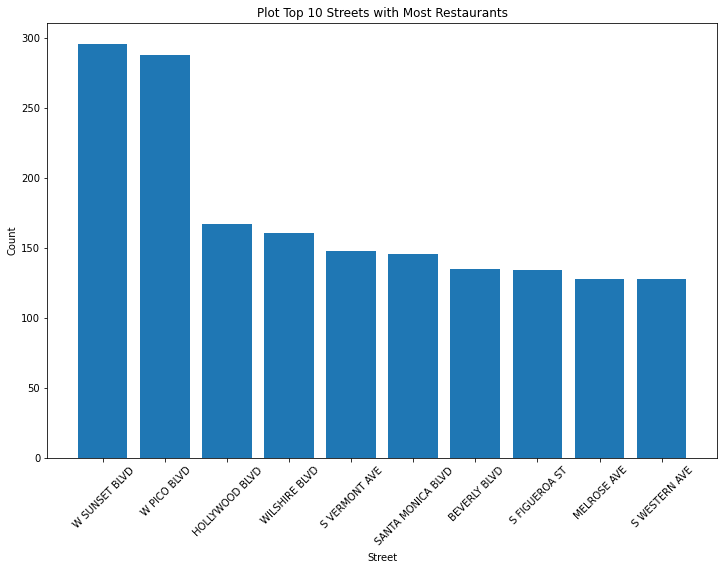

In [334]:
# plotting with matplotlib

plt.figure(figsize=(12,8))
plt.bar(top10_streets_rest['index'], top10_streets_rest['count'])
plt.title('Plot Top 10 Streets with Most Restaurants')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [519]:
top10_streets_rest

,address_name,count,ratio
2,W SUNSET BLVD,296,17.099942
3,W PICO BLVD,288,16.637782
4,HOLLYWOOD BLVD,167,9.647603
6,WILSHIRE BLVD,161,9.300982
7,S VERMONT AVE,148,8.549971
8,SANTA MONICA BLVD,146,8.434431
9,BEVERLY BLVD,135,7.798960
10,S FIGUEROA ST,134,7.741190
11,MELROSE AVE,128,7.394570
12,S WESTERN AVE,128,7.394570


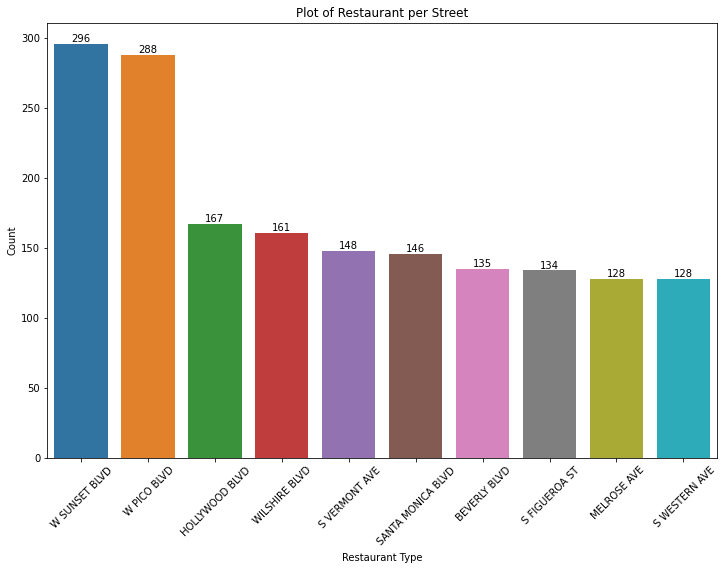

In [521]:
# ploting with seaborn

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='address_name', y='count', data=top10_streets_rest)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Plot of Restaurant per Street')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

    17% of business is found in W SUNSET BLVD and 16% W PICO BLVD the rest of the top ten share is between 9% and 7%

<s><div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Temos um problema por aqui.
    
W e E tratam-se de prefixos para nomes de ruas (da mesma forma que existe a W sunset blvd existe a E sunset blvd), sendo assim não devem ser consideradas ruas como as outras... Precisaremos trabalhar melhor os dados pra lidar com essa situação.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Eu tive de mudar o nome das variáveis. É importante executar o código antes de enviar.
</div>


### Encontre o número de ruas que têm apenas um restaurante.

In [341]:
# saving streets that have only 1 restaurant

street_one_restaurant = rest_by_address.query('count == 1')
street_one_restaurant.head()

,index,count
1050,JEFFERSON BLVD STE,1
1040,S VERMONT AVE STE A,1
1034,SEPULVEDA BLVD STE,1
1035,S LA BREA AVE STE E,1
1036,E IMPERIAL HWY UNIT,1


In [342]:
street_one_restaurant['count'].sum()

689

    689 streets have only one restaurant

<s><div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Esse número pode mudar após o ajuste da questão anterior.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Nao percebi aonde o ajuste da questao anterior influenciaria nessa.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor</strong>

Correto</div>


### Para as ruas com muitos restaurantes, olhe para a distribuição de número de assentos. Quais tendências você consegue notar?

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Tive de renomear as variáveis
</div>

In [349]:
# renaming column

top10_streets_rest.rename(columns={'index':'address_name'}, inplace=True)

In [350]:
# saving top10 addresses

top10_busy_streets = top10_streets_rest['address_name']

In [351]:
# querying only restaurants on top 10 busy streets

top10_street_rest = rest.query('address_name in @top10_busy_streets')

In [352]:
top10_street_rest

,id,object_name,address,chain,object_type,number,address_name
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
16,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,WILSHIRE BLVD
18,11804,MURAKAMI,7160 MELROSE AVE,False,Restaurant,139,MELROSE AVE
22,11808,CAMY'S GRILL,3339 WILSHIRE BLVD,False,Restaurant,39,WILSHIRE BLVD
...,...,...,...,...,...,...,...
9628,21414,KIFF KAFE,12217 W PICO BLVD,False,Restaurant,29,W PICO BLVD
9630,21416,SALVATORE'S ON MELROSE,7356 MELROSE AVE,False,Restaurant,101,MELROSE AVE
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135,S WESTERN AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE


In [353]:
# grouping avg seat of top10 rest

top10_street_seat_avg = top10_street_rest.groupby('address_name')['number'].mean().round(2).reset_index().sort_values(by='number', ascending=False)

In [354]:
top10_street_seat_avg

,address_name,number
9,WILSHIRE BLVD,62.13
1,HOLLYWOOD BLVD,53.73
2,MELROSE AVE,52.43
8,W SUNSET BLVD,50.92
3,S FIGUEROA ST,50.76
4,S VERMONT AVE,45.88
0,BEVERLY BLVD,44.77
5,S WESTERN AVE,43.10
7,W PICO BLVD,40.88
6,SANTA MONICA BLVD,32.39


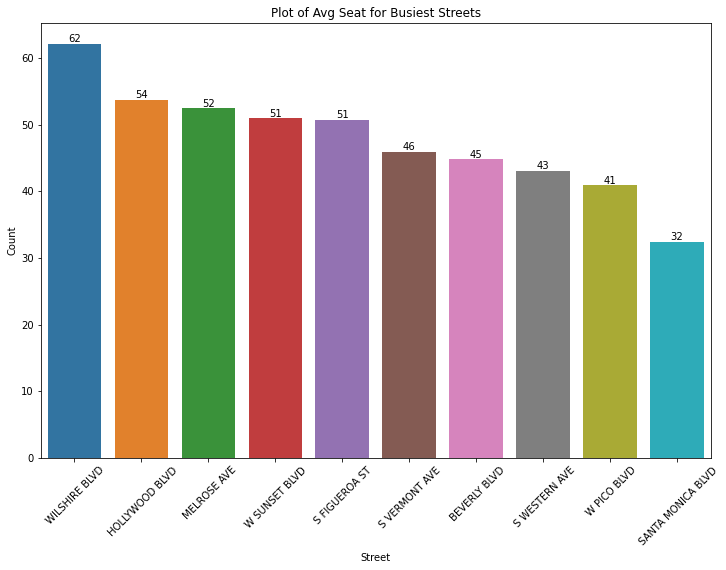

In [355]:
# plotting with seaborn

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='address_name', y='number', data=top10_street_seat_avg)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Plot of Avg Seat for Busiest Streets')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<s><div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Essa análise seria muito mais poderosa se compararmos o resultado com o de ruas com menos estabelecimentos.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Tive de renomear o nome da coluna
</div>


In [365]:
# saving top10 of one street resturant variable

top10_street_one_resturant = street_one_restaurant['address_name'].head(10)

In [366]:
# filtering by top 10 streets with one restaurant

top10_street_one_rest = rest.query('address_name in @top10_street_one_resturant')

In [367]:
top10_street_one_rest.head(10)

,id,object_name,address,chain,object_type,number,address_name
842,12628,MONO POKE,8800 SEPULVEDA BLVD STE 3,False,Restaurant,16,SEPULVEDA BLVD STE
860,12646,POKE ME,310 S LA BREA AVE STE E,True,Restaurant,10,S LA BREA AVE STE E
919,12705,DONUT EXPRESS,425 E IMPERIAL HWY UNIT #A,False,Fast Food,14,E IMPERIAL HWY UNIT
932,12718,CURSON CAFE,475 W CURSON AVE,False,Restaurant,26,W CURSON AVE
946,12732,CRISPY CRUST PIZZA,3111 N GLENDALE BLVD UNIT UNIT,False,Pizza,12,N GLENDALE BLVD UNIT UNIT
948,12734,POLLO CAMPERO,10960 SHERMAN WAY,True,Restaurant,127,SHERMAN WAY
976,12762,LA DONUTS,1514 S VERMONT AVE STE A,False,Fast Food,5,S VERMONT AVE STE A
979,12765,K.H. CHINA EXPRESS,5150 HUNTINGTON DR STE 102,True,Fast Food,9,HUNTINGTON DR STE
1039,12825,CHURCH OF THE EPIPHANY,2808 ALTURA ST,False,Restaurant,41,ALTURA ST
1085,12871,N'ICE CREAM,12746 JEFFERSON BLVD STE 2160,True,Restaurant,15,JEFFERSON BLVD STE


In [368]:
# grouping average seats of top 10 one restaurant per street

top10_street_one_rest_avg_seat = top10_street_one_rest.groupby('address_name')['number'].mean().reset_index().sort_values(by='number',ascending=False)

In [369]:
top10_street_one_rest_avg_seat

,address_name,number
8,SHERMAN WAY,127.0
0,ALTURA ST,41.0
9,W CURSON AVE,26.0
7,SEPULVEDA BLVD STE,16.0
3,JEFFERSON BLVD STE,15.0
1,E IMPERIAL HWY UNIT,14.0
4,N GLENDALE BLVD UNIT UNIT,12.0
5,S LA BREA AVE STE E,10.0
2,HUNTINGTON DR STE,9.0
6,S VERMONT AVE STE A,5.0


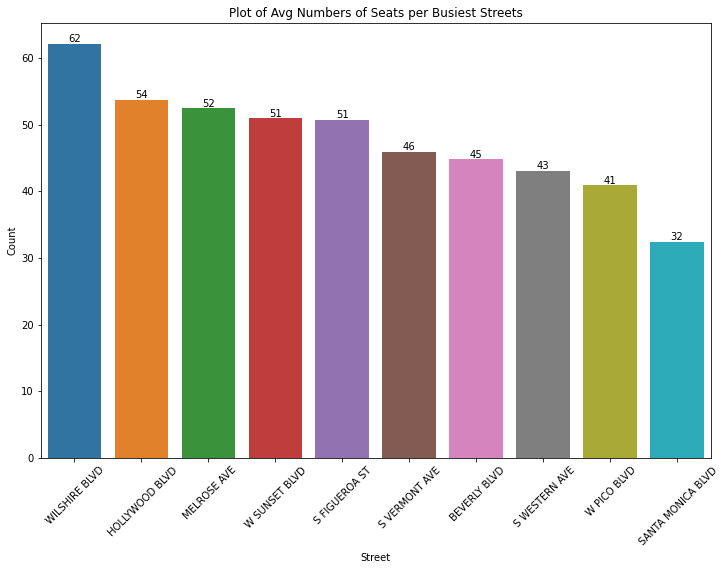

In [370]:
# plotting with seaborn

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='address_name', y='number', data=top10_street_seat_avg)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Plot of Avg Numbers of Seats per Busiest Streets')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 Wilshire Boulevard has the highest average of seats per restaurant all the other restaurants show a similar average in seat availability

In [372]:
top10_street_one_rest_avg_seat

,address_name,number
8,SHERMAN WAY,127.0
0,ALTURA ST,41.0
9,W CURSON AVE,26.0
7,SEPULVEDA BLVD STE,16.0
3,JEFFERSON BLVD STE,15.0
1,E IMPERIAL HWY UNIT,14.0
4,N GLENDALE BLVD UNIT UNIT,12.0
5,S LA BREA AVE STE E,10.0
2,HUNTINGTON DR STE,9.0
6,S VERMONT AVE STE A,5.0


In [511]:
# calculating ratio

top10_street_one_rest_avg_seat['ratio'] = (top10_street_one_rest_avg_seat['number'] / top10_street_one_rest_avg_seat['number'].sum())*100

In [513]:
top10_street_one_rest_avg_seat

,address_name,number,ratio
8,SHERMAN WAY,127.0,46.181818
0,ALTURA ST,41.0,14.909091
9,W CURSON AVE,26.0,9.454545
7,SEPULVEDA BLVD STE,16.0,5.818182
3,JEFFERSON BLVD STE,15.0,5.454545
1,E IMPERIAL HWY UNIT,14.0,5.090909
4,N GLENDALE BLVD UNIT UNIT,12.0,4.363636
5,S LA BREA AVE STE E,10.0,3.636364
2,HUNTINGTON DR STE,9.0,3.272727
6,S VERMONT AVE STE A,5.0,1.818182


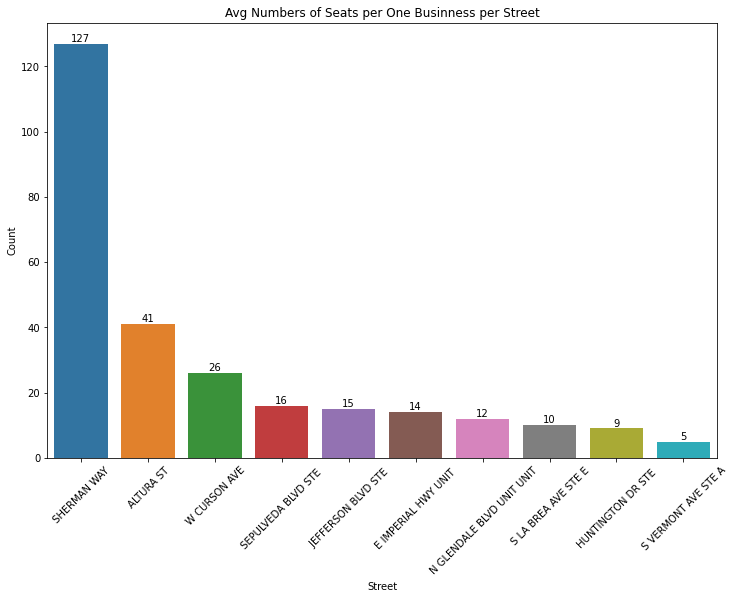

In [373]:
# plotting with seaborn

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='address_name', y='number', data=top10_street_one_rest_avg_seat)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Avg Numbers of Seats per One Businness per Street')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

    When looking at the restaurants that are only ones per street we see a less balanced distribution. Sherman Way St restaurant has 127 seats 7 out of those 10 have under 20 seats available

# coffee shop analysis

In [376]:
cafe = rest.query('object_type == "Cafe"')
cafe

,id,object_name,address,chain,object_type,number,address_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
53,11839,PRIME GRIND COFFEE,714 W 1ST ST,False,Cafe,4,W
102,11888,CIVIL COFFEE,5629 N FIGUEROA ST,False,Cafe,17,N FIGUEROA ST
121,11907,ANTIGUA CULTURAL COFFEE,3400 N FIGUEROA ST,False,Cafe,24,N FIGUEROA ST
123,11909,MARIE'S COFFEE AND DELI,731 W 7TH ST,True,Cafe,36,W
...,...,...,...,...,...,...,...
9598,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2,SANTA MONICA BLVD
9610,21396,TERRAZA CAFE COFFEE SHOP,4017 1/2 CITY TERRACE DR,False,Cafe,1,
9623,21409,310 COFFEE COMPANY,11623 WASHINGTON PL,False,Cafe,12,WASHINGTON PL
9635,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD # 120,False,Cafe,4,HOLLYWOOD BLVD


In [377]:
cafe_chain = cafe['chain'].value_counts().reset_index()
cafe_chain

,index,chain
0,True,266
1,False,169


In [378]:
cafe_chain.rename(columns={'chain' : 'count'}, inplace=True)

In [379]:
cafe_chain['ratio'] = (cafe_chain['count'] / cafe_chain['count'].sum())*100

In [380]:
cafe_chain

,index,count,ratio
0,True,266,61.149425
1,False,169,38.850575


In [381]:
avg_cafe_seat = cafe.groupby('chain')['number'].mean().reset_index()
avg_cafe_seat

,chain,number
0,False,23.556213
1,True,25.917293


In [382]:
cafe_chain

,index,count,ratio
0,True,266,61.149425
1,False,169,38.850575


In [383]:
cafe_chain_seat = cafe_chain.merge(avg_cafe_seat, left_on='index', right_on='chain')
cafe_chain_seat

,index,count,ratio,chain,number
0,True,266,61.149425,True,25.917293
1,False,169,38.850575,False,23.556213


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Tive de corrigir o left_on e right_on. Veja como fiz
</div>

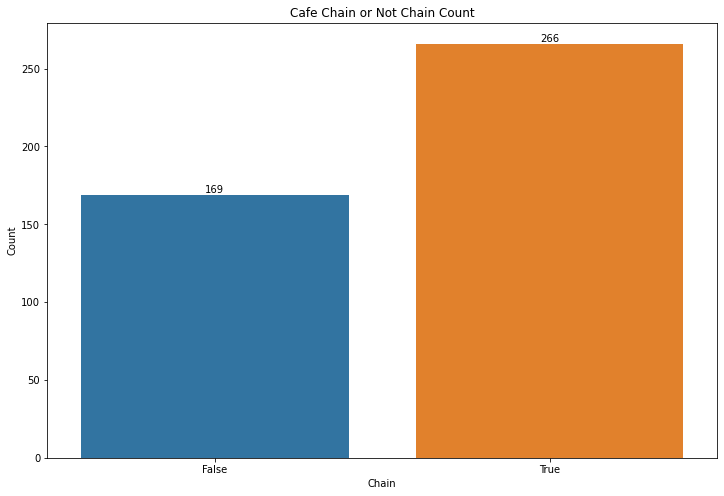

In [385]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='chain', y='count', data=cafe_chain_seat)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Cafe Chain or Not Chain Count')
plt.xlabel('Chain')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

    61% of all the cafes' in LA are chain

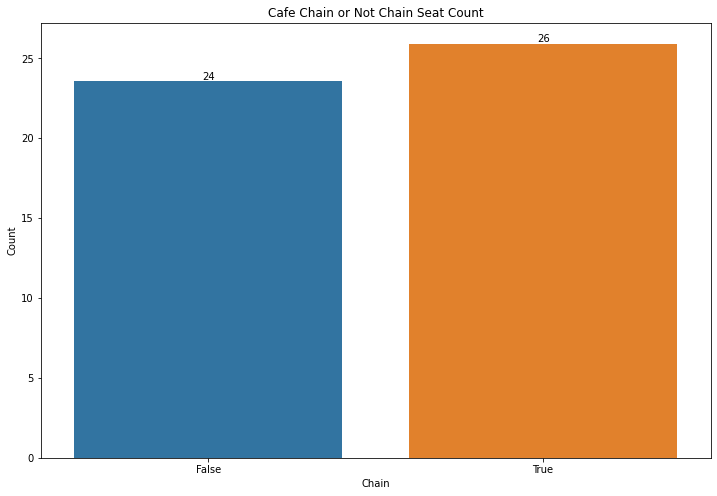

In [387]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='chain', y='number', data=cafe_chain_seat)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Cafe Chain or Not Chain Seat Count')
plt.xlabel('Chain')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

    very small difference in seats regardless there are chain cafe or not

In [389]:
cafe.head()


,id,object_name,address,chain,object_type,number,address_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
53,11839,PRIME GRIND COFFEE,714 W 1ST ST,False,Cafe,4,W
102,11888,CIVIL COFFEE,5629 N FIGUEROA ST,False,Cafe,17,N FIGUEROA ST
121,11907,ANTIGUA CULTURAL COFFEE,3400 N FIGUEROA ST,False,Cafe,24,N FIGUEROA ST
123,11909,MARIE'S COFFEE AND DELI,731 W 7TH ST,True,Cafe,36,W


In [390]:
cafe['address_name']

0        N EAGLE ROCK BLVD
53                      W 
102          N FIGUEROA ST
121          N FIGUEROA ST
123                     W 
               ...        
9598     SANTA MONICA BLVD
9610                      
9623         WASHINGTON PL
9635       HOLLYWOOD BLVD 
9649      S SPRING ST STE 
Name: address_name, Length: 435, dtype: object

In [391]:
cafe_by_address = cafe['address_name'].value_counts().reset_index().sort_values(by='address_name',ascending=False)

In [392]:
cafe_by_address.head(10)

,index,address_name
0,W,35
1,W SUNSET BLVD,21
2,E,13
3,W PICO BLVD,11
4,WORLD WAY,10
5,,10
6,WORLD WAY,10
7,WILSHIRE BLVD STE,9
8,SANTA MONICA BLVD,8
11,WILSHIRE BLVD,7


In [393]:
# selecting indexes that contain wrong information for analysis

index_to_drop2 = [0,2,4,5]

In [394]:
cafe_by_address.drop(index_to_drop2, inplace=True)

In [395]:
top10_cafe_address = cafe_by_address.head(10)

In [396]:
top10_cafe_address

,index,address_name
1,W SUNSET BLVD,21
3,W PICO BLVD,11
6,WORLD WAY,10
7,WILSHIRE BLVD STE,9
8,SANTA MONICA BLVD,8
11,WILSHIRE BLVD,7
10,HOLLYWOOD BLVD,7
9,WESTWOOD BLVD,7
12,BEVERLY BLVD,6
13,WORLD WAY T,6


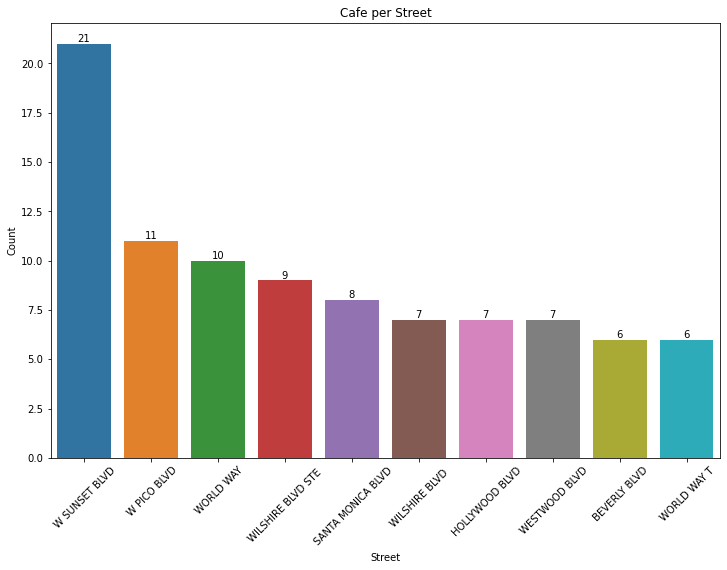

In [397]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='index', y='address_name', data=top10_cafe_address)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), round(p.get_height()), ha='center', va='bottom')
plt.title('Cafe per Street')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

    W Sunset Blvd street is the busiest street for cafe followed by W Pico Blvd

# Conclusion

### Tire uma conclusão geral e apresente recomendações sobre o tipo mais apropriado de restaurante e o número de assentos. Comente sobre a possibilidade de desenvolver uma rede.

75% of all hospitality in LA are conventional restaurants. 

The busiest street of LA is W Sunset Blvd but the highest seat offer, Willshire Blvd has average of 62 seats per restaurant whereas West street only 44. This might be caused by a busiest street having a large foot flow and smaller amount of seats counting on clients to be quick.

Based on the above I would recommend a fast food chain restaurant on the West St or an authentic non-chain restaurant in Willshire Blvd.

Restaurants make the higher share in chain hospitality I would reccomend investing on those

There are no data about revenue to determine whether your business will have chances of succeed or not.

Some business that are open running might be suffering loss and be near to close down.


presentation : https://github.com/ramalhorenan/projects/blob/main/sprint9_presentation.pdf

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Você chegou a fazer uma apresentação em PDF com os resultados?

Poderia por favor enviar o link por aqui?
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Corrigi alguns passos. Um deles acima preciso de ajuda, nao consegui achar uma solucao.

Gostaria de saber se a conclusao estava no caminho certo primeiro aqui antes de fazer a apresentacao.

A apresentacao posso subir ela no github, e deixar aqui o link ? Estava pensando em fazer no powerpoint, pode ser ? 
</div>

<s>
<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Estamos perto da aprovação. Veja as dicas que deixei. Houve avanços. Dica: execute o código antes de enviar e tente consertar os erros.
Vamos fazer mais uma revisão.    
</div>